In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [3]:
import time
import os
import numpy as np

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

import torch 
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#AlexNet Based Models

In [ ]:
# AlexNet Architecture 
# Version 1.0
class AlexClassifier(nn.Module):
  def __init__(self):
    super(AlexClassifier, self).__init__()
    self.name = 'AlexClassifier'
    # looking for a three-channel input
    self.conv1 = nn.Conv2d(256, 2048, 3)
    self.pool = nn.MaxPool2d(2, 2)
    self.fc1 = nn.Linear(2 * 2 * 2048, 2048)
    self.fc2 = nn.Linear(2048, 1024)
    self.fc3 = nn.Linear(1024, 256)
    self.fc4 = nn.Linear(256, 6)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = x.view(-1, 2 * 2 * 2048) #flatten feature data
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return x

In [5]:
# AlexNet Architecture 
# Version 1.1
class AlexClassifier11(nn.Module):
  def __init__(self):
    super(AlexClassifier11, self).__init__()
    self.name = 'AlexClassifier11'
    # looking for a three-channel input
    self.conv1 = nn.Conv2d(256, 4096, kernel_size=3)
    self.pool = nn.MaxPool2d(2, 2)
    self.fc1 = nn.Linear(2 * 2 * 4096, 4096)
    self.fc2 = nn.Linear(4096, 1024)
    self.fc3 = nn.Linear(1024, 256)
    self.fc4 = nn.Linear(256, 6)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = x.view(-1, 2 * 2 * 4096) # flatten feature data
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return x

In [ ]:
# AlexNet Architecture 
# Version 1.2
class AlexClassifier12(nn.Module):
  def __init__(self):
    super(AlexClassifier12, self).__init__()
    self.name = 'AlexClassifier12'
    # looking for a three-channel input
    self.conv1 = nn.Sequential(
        nn.Conv2d(256, 1024, kernel_size=3),
        nn.BatchNorm2d(num_features=1024),
        nn.RReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2)   
    )

    self.fc = nn.Sequential(
        nn.Dropout(p=0.2),
        nn.Linear(2 * 2 * 1024, 1024),
        nn.RReLU(inplace=True), 

        nn.Dropout(p=0.5),
        nn.Linear(1024, 512),
        nn.RReLU(inplace=True),
      
        nn.Linear(512, 256),
        nn.RReLU(inplace=True),

        nn.Linear(256, 6)
    )

  def forward(self, x):
    x = self.conv1(x)
    x = x.view(-1, 2 * 2 * 1024) #flatten feature data
    x = self.fc(x)
    return x

In [ ]:
# AlexNet Architecture 
# Version 2.0
class AlexClassifier2(nn.Module):
  def __init__(self):
    super(AlexClassifier2, self).__init__()
    self.name = 'AlexClassifier2'
    # looking for a three-channel input
    self.conv1 = nn.Conv2d(256, 1024, kernel_size=3, padding=2)
    self.conv2 = nn.Conv2d(1024, 4096, kernel_size=3, padding=2)
    self.pool = nn.MaxPool2d(2, 2)
    self.fc1 = nn.Linear(3 * 3 * 4096, 4096)
    self.fc2 = nn.Linear(4096, 1024)
    self.fc3 = nn.Linear(1024, 256)
    self.fc4 = nn.Linear(256, 6)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 3 * 3 * 4096) #flatten feature data
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return x

In [ ]:
def gaussian_weights_init(m):
  classname = m.__class__.__name__
  if classname.find('Conv') != -1:
    m.weight.data.normal_(0.0, 0.04)

# AlexNet Architecture 
# Version 2.1
class AlexClassifier21(nn.Module):
  def __init__(self):
    super(AlexClassifier21, self).__init__()
    self.name = 'AlexClassifier21'
    # looking for a three-channel input
    self.conv1 = nn.Sequential(
        nn.Conv2d(256, 1024, kernel_size=3, padding=2),
        nn.BatchNorm2d(num_features=1024),
        nn.RReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2)   
    )
    
    self.conv2 = nn.Sequential(
        nn.Conv2d(1024, 4096, kernel_size=3, padding=2),
        nn.BatchNorm2d(num_features=4096),
        nn.RReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.conv1.apply(gaussian_weights_init)
    self.conv2.apply(gaussian_weights_init)

    self.fc = nn.Sequential(
        nn.Dropout(p=0.2),
        nn.Linear(3 * 3 * 4096, 4096),
        nn.RReLU(inplace=True), 

        nn.Dropout(p=0.5),
        nn.Linear(4096, 1024),
        nn.RReLU(inplace=True),
      
        nn.Linear(1024, 256),
        nn.RReLU(inplace=True),

        nn.Linear(256, 6)
    )

  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = x.view(-1, 3 * 3 * 4096) #flatten feature data
    x = self.fc(x)
    return x

#Training Functions

In [6]:
def get_stastics(model, data, batch_size):
  # Load data
  data_loader = torch.utils.data.DataLoader(data, batch_size=batch_size)

  correct, total = 0, 0
  running_corrects, running_loss = 0.0, 0
  criterion = nn.CrossEntropyLoss()

  for imgs, labels in data_loader:
    #############################################
    #To Enable GPU Usage
    if use_cuda and torch.cuda.is_available():
      imgs = imgs.cuda()
      labels = labels.cuda()
    #############################################
    
    output = model(imgs)
    loss = criterion(output, labels)
    
    #select index with maximum prediction score
    preds = output.max(1, keepdim=True)[1]

    # Get Accuracy
    correct += preds.eq(labels.view_as(preds)).sum().item()
    total += imgs.shape[0]
    accuracy = correct / total

    # Get F1 score
    running_loss += loss.item() * imgs.size(0)
    running_corrects += torch.sum(preds == labels.data)

    from sklearn.metrics import f1_score

    f1_score = f1_score(labels.cpu().data, preds.cpu(), average='micro')

  return accuracy, f1_score

In [7]:
def train(model, train_data, val_data, batch_size=64, learning_rate = 0.01, num_epochs=1):
  torch.manual_seed(1000) # set the random seed

  train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)

  iters, train_acc, val_acc, train_f1, val_f1 = np.zeros(num_epochs), np.zeros(num_epochs), np.zeros(num_epochs), np.zeros(num_epochs), np.zeros(num_epochs)

  # training
  n = 0 # the number of iterations
  start_time=time.time()
  for epoch in range(num_epochs):
    for imgs, labels in iter(train_loader):
    
      #############################################
      #To Enable GPU Usage
      if use_cuda and torch.cuda.is_available():
        imgs = imgs.cuda()
        labels = labels.cuda()
      #############################################
    
      out = model(imgs)             # forward pass
      loss = criterion(out, labels) # compute the total loss
      loss.backward()               # backward pass (compute parameter updates)
      optimizer.step()              # make the updates for each parameter
      optimizer.zero_grad()         # a clean up step for PyTorch

    # save the current training statistics
    iters[epoch] = n

    train_acc[epoch], train_f1[epoch] = get_stastics(model, train_data, batch_size=batch_size) # compute training 
    val_acc[epoch], val_f1[epoch] = get_stastics(model, val_data, batch_size=batch_size)  # compute validation 

    n += 1

    print ("Epoch %d Finished." % epoch, "Time per Epoch: % 6.2f s. "% ((time.time()-start_time) / (epoch +1)), 
           "Validation Accuracy is", val_acc[epoch], ". Validation F1 score is", val_f1[epoch])

  # save models for later usage
  # model_path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(model.name, batch_size, learning_rate, num_epochs)
  model_path = "/content/drive/MyDrive/ECE/2022Winter/APS360/APS 360 Project/Models/AlexNet/model_{0}_bs{1}_lr{2}_epoch{3}".format(model.name, batch_size, learning_rate, num_epochs)
  torch.save(model.state_dict(), model_path)

  end_time= time.time()
  
  # plotting
  plt.title("F1 Score Curve")
  plt.plot(iters, train_f1, label="Training")
  plt.plot(iters, val_f1, label="Validation")
  plt.xlabel("Iterations")
  plt.ylabel("F1 Score")
  plt.legend(loc='best')
  plt.show()

  plt.title("Accuracy Curve")
  plt.plot(iters, train_acc, label="Training")
  plt.plot(iters, val_acc, label="Validation")    
  plt.xlabel("Iterations")
  plt.ylabel("Accuracy")
  plt.legend(loc='best')
  plt.show()

  print("Final Training Accuracy: {}".format(train_acc[-1]))
  print("Final Validation Accuracy: {}".format(val_acc[-1]))
  print("Final Training F1 Score: {}".format(train_f1[-1]))
  print("Final Validation F1 Score: {}".format(val_f1[-1]))

#Load Data



In [8]:
# Define pathes
daniel_dir = '/content/drive/MyDrive/APS360/Project_dataset/'
charlie_dir = '/content/drive/MyDrive/ECE/2022Winter/APS360/Dataset/'
jeff_dir = '/content/drive/MyDrive/APS360-Project/Dataset/'
# Choose path
data_dir = charlie_dir

# define training and test data directories
train_dir = os.path.join(data_dir, 'train/')
val_dir = os.path.join(data_dir, 'validation/')
test_dir = os.path.join(data_dir, 'test/')

In [9]:
# load and transform data using ImageFolder
data_transform = transforms.Compose([transforms.Resize(224), transforms.ToTensor()])

train_data = datasets.ImageFolder(train_dir, transform=data_transform)
val_data = datasets.ImageFolder(val_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)

# print out some data stats
print('Num training images: ', len(train_data))
print('Num validation images: ', len(val_data))
print('Num test images: ', len(test_data))

Num training images:  18000
Num validation images:  3862
Num test images:  3860


In [ ]:
# Resize training data (Run only once)
for i in range(len(train_data)): 
  if (i % 1000 == 0):
    print(i, " has been completely searched")
  if train_data[i][0].shape != torch.Size([3, 224, 224]): 
    print("Training set image", i, ": ", train_data[i][0].shape)

In [ ]:
# Resize validation data (Run only once)
for i in range(len(val_data)): 
  # print(i)
  print(i, " has been completely searched")
  if val_data[i][0].shape != torch.Size([3, 224, 224]): 
    print("Validation set image", i, ": ", val_data[i][0].shape)

In [ ]:
# Resize testing data (Run only once)
for i in range(len(test_data)):
  # print(i) 
  print(i, " has been completely searched")
  if test_data[i][0].shape != torch.Size([3, 224, 224]): 
    print("Testing set image", i, ": ", test_data[i][0].shape)

#Load Features

In [10]:
use_cuda = True
labels = ["disgust", "fear", "happy", "neutral", "sad", "surprise"]

In [11]:
!nvidia-smi

Mon Apr  4 04:43:46 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [12]:
# Choose Path
daniel_dir = '/content/drive/MyDrive/APS360/Project_dataset/alex_data'
charlie_dir = '/content/drive/MyDrive/ECE/2022Winter/APS360/Dataset/feature/'
jeff_dir = '/content/root/alex_feature/'
feature_dir = charlie_dir

train_feature = os.path.join(feature_dir, 'train/')
val_feature = os.path.join(feature_dir, 'validation/')
test_feature = os.path.join(feature_dir, 'test/')

In [ ]:
# Generate training features (Run only once)
n = 0
train_loader = torch.utils.data.DataLoader(train_data, batch_size=1)
for img, label in iter(train_loader):
  if use_cuda and torch.cuda.is_available():
    features = alexnet.features(img).cuda()
    features_tensor = torch.from_numpy(features.cpu().detach().numpy())

  folder_dir = train_feature + str(labels[label])
  if str(labels[label]) == 'disgust':
    torch.save(features_tensor.squeeze(0), folder_dir + '/' + str(n) + '.tensor')
  n += 1

In [ ]:
# Generate validation features (Run only once)
n = 0 
val_loader = torch.utils.data.DataLoader(val_data, batch_size=1)
for img, label in iter(val_loader): 
  if use_cuda and torch.cuda.is_available():
    features = alexnet.features(img).cuda()
    features_tensor = torch.from_numpy(features.cpu().detach().numpy())

  folder_dir = val_feature + str(labels[label])
  if str(labels[label]) == 'disgust':
    torch.save(features_tensor.squeeze(0), folder_dir + '/' + str(n) + '.tensor')
  n += 1

In [ ]:
# Generate testing features (Run only once)
n = 0 
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1)
for img, label in iter(test_loader): 
  if use_cuda and torch.cuda.is_available():
    features = alexnet.features(img).cuda()
    features_tensor = torch.from_numpy(features.cpu().detach().numpy())

  folder_dir = test_feature + str(labels[label])
  if str(labels[label]) == 'disgust':
    torch.save(features_tensor.squeeze(0), folder_dir + '/' + str(n) + '.tensor')
  n += 1

In [12]:
img = train_data[0][0]
img.shape
img = img.reshape([1, 3, 224, 224]) # add a dimension for batching
print(img.shape)

features = alexnet.features(img)
features.shape

torch.Size([1, 3, 224, 224])


torch.Size([1, 256, 6, 6])

In [13]:
train_data_hat = torchvision.datasets.DatasetFolder(train_feature, loader=torch.load, extensions=('.tensor'))
val_data_hat = torchvision.datasets.DatasetFolder(val_feature, loader=torch.load, extensions=('.tensor'))
test_data_hat = torchvision.datasets.DatasetFolder(test_feature, loader=torch.load, extensions=('.tensor'))

In [ ]:
# Resize training features (Run only once)
for i in range(len(train_data_hat)): 
  if (i % 200 == 0):
    print(i, " has been completely searched")
  if train_data_hat[i][0].shape != torch.Size([256, 6, 6]): 
    print("Training set image", i, ": ", train_data_hat[i][0].shape)

In [ ]:
# Resize validation features (Run only once)
for i in range(len(val_data_hat)): 
  if (i % 200 == 0):
    print(i, " has been completely searched")
  if val_data_hat[i][0].shape != torch.Size([256, 6, 6]): 
    print("Training set image", i, ": ", val_data_hat[i][0].shape)

In [ ]:
# Resize testing features (Run only once)
for i in range(len(test_data_hat)): 
  if (i % 1000 == 0):
    print(i, " has been completely searched")
  if test_data_hat[i][0].shape != torch.Size([256, 6, 6]): 
    print("Training set image", i, ": ", test_data_hat[i][0].shape)

#Tests of Model Ver1.0

In [ ]:
# Model 1. 
model = AlexClassifier() 
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')

train(model, train_data_hat, val_data_hat, batch_size=150, learning_rate=0.001, num_epochs=20)

CUDA is available!  Training on GPU ...
Epoch 0 Finished. Time per Epoch:  58.56 s.  Validation Accuracy is 0.49300880372863803 . Training F1 score is 0.7125
Epoch 1 Finished. Time per Epoch:  57.90 s.  Validation Accuracy is 0.502848265147592 . Training F1 score is 0.8125
Epoch 2 Finished. Time per Epoch:  57.73 s.  Validation Accuracy is 0.5147591921284309 . Training F1 score is 0.9375
Epoch 3 Finished. Time per Epoch:  57.24 s.  Validation Accuracy is 0.5077679958570689 . Training F1 score is 0.775
Epoch 4 Finished. Time per Epoch:  57.18 s.  Validation Accuracy is 0.523045054375971 . Training F1 score is 0.9500000000000001
Epoch 5 Finished. Time per Epoch:  57.48 s.  Validation Accuracy is 0.5264111859140341 . Training F1 score is 0.9625000000000001
Epoch 6 Finished. Time per Epoch:  57.55 s.  Validation Accuracy is 0.5134645261522527 . Training F1 score is 0.9125
Epoch 7 Finished. Time per Epoch:  57.60 s.  Validation Accuracy is 0.5147591921284309 . Training F1 score is 1.0
Epoch

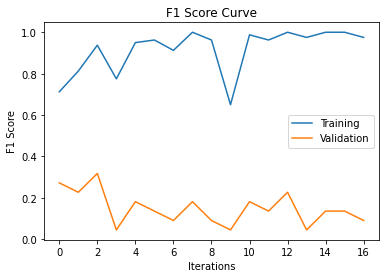

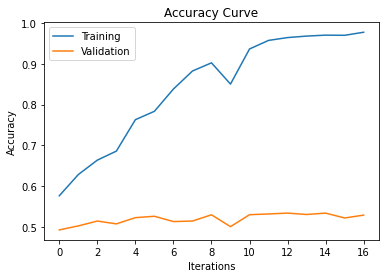

Final Training Accuracy: 0.9773333333333334
Final Validation Accuracy: 0.5292594510616261
Final Training F1 Score: 0.975
Final Validation F1 Score: 0.09090909090909091


In [ ]:
# Model 2. 
# Decrease learning rate from 0.001 to 0.0005
# Decrease epoch number from 20 to 18
# ATTENTION: Increase learning rate with the same batch size will take much longer time to train. 
# It takes more than 40min for the first epoch.
model = AlexClassifier() 
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')

train(model, train_data_hat, val_data_hat, batch_size=128, learning_rate=0.0005, num_epochs=17)

CUDA is available!  Training on GPU ...
Epoch 0 Finished. Time per Epoch:  56.74 s.  Validation Accuracy is 0.4707405489383739 . Validation F1 score is 0.18181818181818182
Epoch 1 Finished. Time per Epoch:  56.71 s.  Validation Accuracy is 0.4984464008285862 . Validation F1 score is 0.22727272727272727
Epoch 2 Finished. Time per Epoch:  56.44 s.  Validation Accuracy is 0.5113930605903677 . Validation F1 score is 0.2727272727272727
Epoch 3 Finished. Time per Epoch:  56.38 s.  Validation Accuracy is 0.5134645261522527 . Validation F1 score is 0.09090909090909091
Epoch 4 Finished. Time per Epoch:  56.77 s.  Validation Accuracy is 0.5243397203521492 . Validation F1 score is 0.22727272727272727
Epoch 5 Finished. Time per Epoch:  57.00 s.  Validation Accuracy is 0.53495598135681 . Validation F1 score is 0.22727272727272727
Epoch 6 Finished. Time per Epoch:  57.19 s.  Validation Accuracy is 0.5409114448472294 . Validation F1 score is 0.18181818181818182
Epoch 7 Finished. Time per Epoch:  57.2

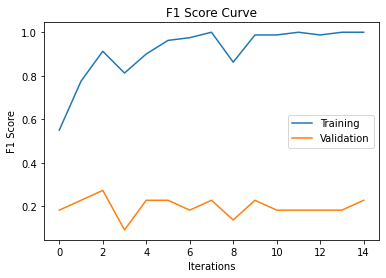

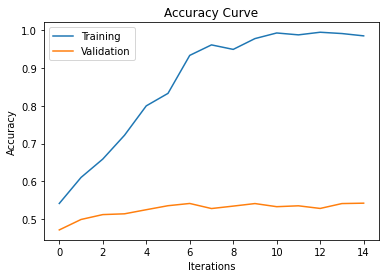

Final Training Accuracy: 0.9855555555555555
Final Validation Accuracy: 0.5416882444329363
Final Training F1 Score: 1.0
Final Validation F1 Score: 0.22727272727272727


In [ ]:
# Model 3. 
# Decrease learning rate from 0.001 to 0.0002
# Decrease epochs from 20 to 15
# Decrease batch size from 150 to 128 
model = AlexClassifier() 
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')

train(model, train_data_hat, val_data_hat, batch_size=128, learning_rate=1e-4, num_epochs=15)

In [ ]:
# Model 4. 
# Decrease learning rate from 0.001 to 0.0003
# Decrease epochs from 20 to 13
model = AlexClassifier() 
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')

train(model, train_data_hat, val_data_hat, batch_size=64, learning_rate=3e-4, num_epochs=13)

CUDA is available!  Training on GPU ...
Epoch 0 Finished. Time per Epoch:  63.24 s.  Validation Accuracy is 0.49274987053340236 . Validation F1 score is 0.3181818181818182
Epoch 1 Finished. Time per Epoch:  61.74 s.  Validation Accuracy is 0.48886587260486797 . Validation F1 score is 0.22727272727272727
Epoch 2 Finished. Time per Epoch:  61.06 s.  Validation Accuracy is 0.5157949249093734 . Validation F1 score is 0.22727272727272727
Epoch 3 Finished. Time per Epoch:  60.70 s.  Validation Accuracy is 0.516053858104609 . Validation F1 score is 0.045454545454545456
Epoch 4 Finished. Time per Epoch:  60.67 s.  Validation Accuracy is 0.53495598135681 . Validation F1 score is 0.13636363636363635
Epoch 5 Finished. Time per Epoch:  60.42 s.  Validation Accuracy is 0.5385810460901087 . Validation F1 score is 0.09090909090909091
Epoch 6 Finished. Time per Epoch:  60.20 s.  Validation Accuracy is 0.5328845157949249 . Validation F1 score is 0.13636363636363635
Epoch 7 Finished. Time per Epoch:  60

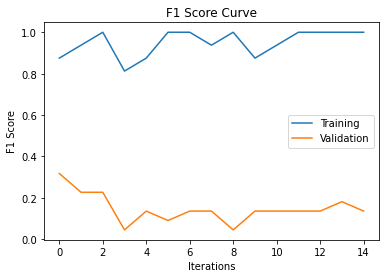

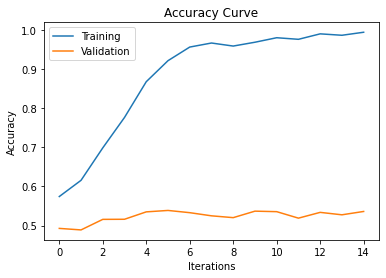

Final Training Accuracy: 0.9935555555555555
Final Validation Accuracy: 0.5359917141377525
Final Training F1 Score: 1.0
Final Validation F1 Score: 0.13636363636363635


In [ ]:
# Model 5. 
# Increase batch size from 150 to 256
# Increase learning rate from 0.001 to 0.005
# Decrease epochs from 20 to 15
model = AlexClassifier() 
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')

train(model, train_data_hat, val_data_hat, batch_size=32, learning_rate=5e-5, num_epochs=15)
# The result is bad
# Thus we won't try to increase batch size and learning rate in the following models

In [ ]:
# Model 6. 
# Decrease batch size from 150 to 64
# Increase learning rate from 0.001 to 0.0001
# Decrease epochs from 20 to 15
model = AlexClassifier() 
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')

train(model, train_data_hat, val_data_hat, batch_size=256, learning_rate=0.001, num_epochs=15)

In [ ]:
# Model 7. 
# Decrease batch size from 150 to 64
# Increase learning rate from 0.001 to 0.00005
# Decrease epochs from 20 to 13
model = AlexClassifier() 
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')

train(model, train_data_hat, val_data_hat, batch_size=512, learning_rate=0.005, num_epochs=13)

In [ ]:
# Model 8. 
# Decrease batch size from 150 to 32
# Increase learning rate from 0.001 to 0.00005
# Decrease epochs from 20 to 13
model = AlexClassifier() 
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')

train(model, train_data_hat, val_data_hat, batch_size=32, learning_rate=3e-6, num_epochs=14)

In [ ]:
# Best model
best_model = AlexClassifier()

if use_cuda and torch.cuda.is_available():
  best_model.cuda()
  print('CUDA is available!  Training on GPU ...')

best_model_path = 'model_{0}_bs{1}_lr{2}_epoch{3}'.format('AlexClassifier', 64, 0.00005, 13)
best_model_path = '/content/drive/MyDrive/ECE/2022Winter/APS360/APS 360 Project/Models/AlexNet/model_AlexClassifier_bs32_lr5e-05_epoch15'
# best_model_path = '/content/drive/MyDrive/ECE/2022Winter/APS360/APS 360 Project/Models/AlexNet/model_AlexClassifier_bs128_lr0.0001_epoch15'

# Load saved best model
best_model.load_state_dict(torch.load(best_model_path))

# Test Accuracy of the best Model
test_acc, test_f1_score = get_stastics(best_model, test_data_hat, batch_size=32)

print("Test Accuracy:", test_acc)
print("Test F1 Score:", test_f1_score)

CUDA is available!  Training on GPU ...
Test Accuracy: 0.590975043528729
Test F1 Score: 0.0


#Tests of Model Ver1.1

CUDA is available!  Training on GPU ...
Epoch 0 Finished. Time per Epoch:  58.89 s.  Validation Accuracy is 0.4691869497669601 . Validation F1 score is 0.16071428571428573
Epoch 1 Finished. Time per Epoch:  57.61 s.  Validation Accuracy is 0.5059554634904194 . Validation F1 score is 0.26785714285714285
Epoch 2 Finished. Time per Epoch:  57.27 s.  Validation Accuracy is 0.5100983946141895 . Validation F1 score is 0.25
Epoch 3 Finished. Time per Epoch:  57.14 s.  Validation Accuracy is 0.5352149145520456 . Validation F1 score is 0.26785714285714285
Epoch 4 Finished. Time per Epoch:  56.76 s.  Validation Accuracy is 0.5390989124805801 . Validation F1 score is 0.29464285714285715
Epoch 5 Finished. Time per Epoch:  56.34 s.  Validation Accuracy is 0.5365095805282237 . Validation F1 score is 0.14285714285714285
Epoch 6 Finished. Time per Epoch:  56.10 s.  Validation Accuracy is 0.5290005178663905 . Validation F1 score is 0.22321428571428573
Epoch 7 Finished. Time per Epoch:  55.80 s.  Valida

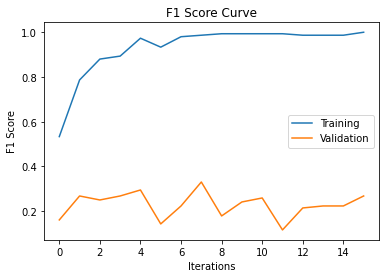

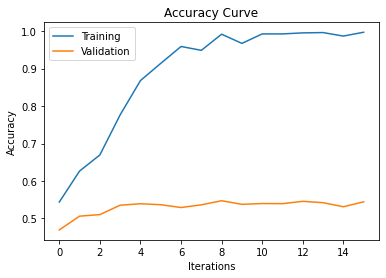

Final Training Accuracy: 0.9972777777777778
Final Validation Accuracy: 0.5442775763852926
Final Training F1 Score: 1.0
Final Validation F1 Score: 0.26785714285714285


In [ ]:
# Model 1. 
model = AlexClassifier11() 
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')

train(model, train_data_hat, val_data_hat, batch_size=150, learning_rate=1e-4, num_epochs=16)

In [ ]:
# Model 2. 
model = AlexClassifier11() 
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')

train(model, train_data_hat, val_data_hat, batch_size=128, learning_rate=1e-4, num_epochs=16)

In [14]:
# Best model
best_model = AlexClassifier11()

if use_cuda and torch.cuda.is_available():
  best_model.cuda()
  print('CUDA is available!  Training on GPU ...')

best_model_path = '/content/drive/MyDrive/ECE/2022Winter/APS360/APS 360 Project/Models/AlexNet/model_AlexClassifier11_bs150_lr0.0001_epoch16'

# Load saved best model
best_model.load_state_dict(torch.load(best_model_path))

# Test Accuracy of the best Model
test_acc, test_f1_score = get_stastics(best_model, test_data_hat, batch_size=150)

print("Test Accuracy:", test_acc)
print("Test F1 Score:", test_f1_score)

CUDA is available!  Training on GPU ...
Test Accuracy: 0.5935867672663958
Test F1 Score: 0.2112676056338028


#Tests of Model Ver1.2

In [ ]:
# Model 1. 
model = AlexClassifier12() 
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')

train(model, train_data_hat, val_data_hat, batch_size=32, learning_rate=1e-6, num_epochs=20)

In [ ]:
# Model 2. 
model = AlexClassifier12() 
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')

train(model, train_data_hat, val_data_hat, batch_size=128, learning_rate=15e-5, num_epochs=16)

In [ ]:
# Best model
best_model = AlexClassifier12()

if use_cuda and torch.cuda.is_available():
  best_model.cuda()
  print('CUDA is available!  Training on GPU ...')

best_model_path = 'model_{0}_bs{1}_lr{2}_epoch{3}'.format('AlexClassifier21', 64, 0.00005, 13)

# Load saved best model
best_model.load_state_dict(torch.load(best_model_path))

# Test Accuracy of the best Model
get_stastics(best_model, test_data_hat, batch_size=64)

#Tests of Model Ver2.0

CUDA is available!  Training on GPU ...
Epoch 0 Finished. Time per Epoch:  58.82 s.  Validation Accuracy is 0.44924909373381666 . Validation F1 score is 0.045454545454545456
Epoch 1 Finished. Time per Epoch:  58.71 s.  Validation Accuracy is 0.48549974106680477 . Validation F1 score is 0.09090909090909091
Epoch 2 Finished. Time per Epoch:  58.47 s.  Validation Accuracy is 0.5010357327809425 . Validation F1 score is 0.18181818181818182
Epoch 3 Finished. Time per Epoch:  58.47 s.  Validation Accuracy is 0.5085447954427758 . Validation F1 score is 0.045454545454545456
Epoch 4 Finished. Time per Epoch:  58.81 s.  Validation Accuracy is 0.525116519937856 . Validation F1 score is 0.09090909090909091
Epoch 5 Finished. Time per Epoch:  58.75 s.  Validation Accuracy is 0.5264111859140341 . Validation F1 score is 0.045454545454545456
Epoch 6 Finished. Time per Epoch:  58.76 s.  Validation Accuracy is 0.5134645261522527 . Validation F1 score is 0.09090909090909091
Epoch 7 Finished. Time per Epoch

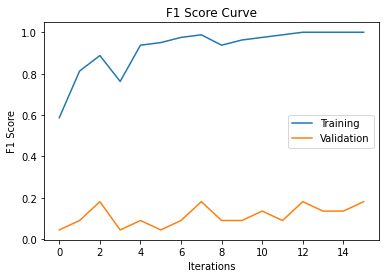

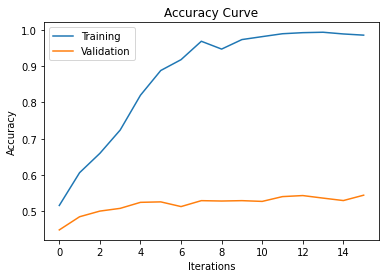

Final Training Accuracy: 0.9851666666666666
Final Validation Accuracy: 0.5447954427757639
Final Training F1 Score: 1.0
Final Validation F1 Score: 0.18181818181818182


In [ ]:
# Model 3. 
model = AlexClassifier2() 
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')

train(model, train_data_hat, val_data_hat, batch_size=128, learning_rate=1e-4, num_epochs=16)

In [ ]:
# Best model
best_model = AlexClassifier2()

if use_cuda and torch.cuda.is_available():
  best_model.cuda()
  print('CUDA is available!  Training on GPU ...')

# best_model_path = 'model_{0}_bs{1}_lr{2}_epoch{3}'.format('AlexClassifier2', 128, 1e-4, 16)
best_model_path = '/content/drive/MyDrive/ECE/2022Winter/APS360/APS 360 Project/Models/AlexNet/model_AlexClassifier2_bs128_lr0.0001_epoch16'

# Load saved best model
best_model.load_state_dict(torch.load(best_model_path))

# Test Accuracy of the best Model
test_acc, test_f1_score = get_stastics(best_model, test_data_hat, batch_size=64)

print("Test Accuracy:", test_acc)
print("Test F1 Score:", test_f1_score)

CUDA is available!  Training on GPU ...
Test Accuracy: 0.5922809053975624
Test F1 Score: 0.09090909090909091


# Test Purpose

Test model parameters as follows: 

batch_size=32, learning_rate=0.00003, num_epochs=13

In [ ]:
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import math
import matplotlib.pyplot as plt

from skimage import io
from skimage.transform import resize
import os

fixed_size = 224

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!wget -N https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
!wget -N https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel

Upload the photo and resize to the required size

In [ ]:
# for testing purpose
# path can be changed to any image if you want
image_file = "/content/87408907_p0.png"
# image_file = take_photo()
# print(image_file)

<IPython.core.display.Javascript object>

photo.jpg


In [ ]:
# image = cv2.imread(image_file, cv2.IMREAD_UNCHANGED)
image = cv2.imread(image_file)

# resize it to have a maximum width of 400 pixels
image = imutils.resize(image, width=400)
(h, w) = image.shape[:2]
print(w,h)
cv2_imshow(image)

Download the pre-trained face detection model, consisting of two files:

- The network definition (deploy.prototxt)
- The learned weights (res10_300x300_ssd_iter_140000.caffemodel) 

In [ ]:
print("[INFO] loading model...")
prototxt = 'deploy.prototxt'
model = 'res10_300x300_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNetFromCaffe(prototxt, model)

# resize it to have a maximum width of 400 pixels
image = imutils.resize(image, width=400)
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

[INFO] loading model...


In [ ]:
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing object detections...


Loop over the detections and crop detected faces.

In [ ]:
list = []
for i in range(0, detections.shape[2]):

	# extract the confidence (i.e., probability) associated with the prediction
	confidence = detections[0, 0, i, 2]

	# filter out weak detections by ensuring the `confidence` is
	# greater than the minimum confidence threshold
	if confidence > 0.5:
		# compute the (x, y)-coordinates of the bounding box for the object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
	
		# print("startX, startY, endX, endY, w, h: ", startX, startY, endX, endY, w, h)
		# by printing the x, y coordinates, finds out that it draws a rectangle,
		# needs to convert to square coordinates
		length_x = endX - startX
		length_y = endY - startY

		# make sure that no faces are out of bounds
		if length_x > length_y:
			startY -= (length_x - length_y) / 2
			endY += (length_x - length_y) / 2
			if startY < 0:
				startY = 0
				endY = length_x
			elif endY > h:
				endY = h
				startY = h - length_x
		else:
			startX -= math.floor(length_y - length_x) / 2
			endX += math.floor(length_y - length_x) / 2
			if startX < 0:
				startX = 0
				endX = length_y
			elif endY > w:
				endX = w
				startX = w - length_y
		startX, endX = math.floor(startX), math.ceil(endX)
		startY, endY = math.floor(startY), math.ceil(endY)

		# store in a list so that we can have multiple images of faces if presented in one image
		print("startX, startY, endX, endY: ", startX, startY, endX, endY)
		list.append([startX, startY, endX, endY])

startX, startY, endX, endY:  162 163 282 282


In [ ]:
cropped_img = []
if list:
  for i in range(len(list)):
    (startX, startY, endX, endY) = list[i]
    img = image[startY : endY, startX : endX]
    cv2_imshow(img)
    img = imutils.resize(img, width = fixed_size)
    cropped_img.append(img)

Show the resulting image, remember to chage the extension to jpg or png


In [ ]:
cv2_imshow(image)
for j in range(len(cropped_img)):
  cv2_imshow(cropped_img[j])
  cv2.imwrite('/content/drive/MyDrive/APS360/Project_dataset/Demo/cropped_img_' + str(j) + '.png', cropped_img[j])

#Visualise Result

Original Image and corresponding emoji

In [ ]:
im_transforms = transforms.Compose([transforms.Resize(fixed_size), transforms.ToTensor(), transforms.Grayscale(num_output_channels=3)])
labels = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

In [ ]:
demon_dir = '/content/drive/MyDrive/APS360/Project_dataset/Demo'
# change this !!!!!!!!!!!!!!!!!!!!!!!!!! 
demo_dataset = datasets.ImageFolder(demon_dir, transform=im_transforms)
demo_loader = torch.utils.data.DataLoader(demo_dataset, batch_size=1)

In [ ]:
# Demonstrate the primary AlexNet model 
alex_demon_dir = '/content/drive/MyDrive/APS360/Project_dataset/alex_data/demo'
alex_demon_loader = torch.utils.data.DataLoader(demo_dataset, batch_size=1)

# Compute features for the demonstration images 
n = 0 
for img, label in iter(alex_demon_loader): 
  if use_cuda and torch.cuda.is_available():
    features = alexnet.features(img).cuda()
    features_tensor = torch.from_numpy(features.cpu().detach().numpy())
  else: 
    features = alexnet.features(img)
    features_tensor = torch.from_numpy(features.detach().numpy())
  
  folder_dir = alex_demon_dir + str(labels[label])
  if not os.path.isdir(folder_dir):
    os.mkdir(folder_dir)
  torch.save(features_tensor.squeeze(0), folder_dir + '/' + str(n) + '.tensor')
  n += 1

# Reload the computed features 
alex_demon_features = torchvision.datasets.DatasetFolder(
    alex_demon_dir, loader=torch.load, extensions=('.tensor'))
alex_demon_features_loader = torch.utils.data.DataLoader(alex_demon_features, batch_size=32)

pred = [] 
for image, label in alex_demon_features_loader: 
  pred.append(F.softmax(alex_model(image.cuda())).tolist())

# obtain one batch of training images
dataiter = iter(demon_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display


In [ ]:
pred = [] 
for image, label in demo_loader: 
  pred.append(F.softmax(Baseline_model(image.cuda())).tolist())

# obtain one batch of training images
dataiter = iter(demo_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

In [ ]:
# Below codes copied from 

axes=plt.subplot(1, 2, 1)
plt.imshow(cropped_img[0])
plt.xlabel('Input Image', fontsize=16)
axes.set_xticks([])
axes.set_yticks([])
plt.tight_layout()

plt.subplots_adjust(left=0.05, bottom=0.2, right=0.95, top=0.9, hspace=0.02, wspace=0.3)

axes=plt.subplot(1, 2, 2)
emojis_img = io.imread('images/emojis/%s.png' % str(class_names[int(predicted.cpu().numpy())]))
plt.imshow(emojis_img)
plt.xlabel('Emoji Expression', fontsize=16)
axes.set_xticks([])
axes.set_yticks([])
plt.tight_layout()
# show emojis

#plt.show()
plt.savefig(os.path.join('images/results/l.png'))
plt.close()

print("The Expression is %s" %str(class_names[int(predicted.cpu().numpy())]))